In [42]:
%cd /content/drive/MyDrive/Dataset/ipage

/content/drive/MyDrive/Dataset/ipage


# Import

In [5]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [53]:
df = pd.read_csv('IPAGE_SoilData_cleaned.csv')
df = df.drop('Data Collection Year', axis=1) # we don't need this
df = df.fillna('UNK (surface)')

In [54]:
df.head()

,Area,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95
3,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00
4,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04


In [55]:
df.shape

(618, 12)



*   There are 618 observations and 12 columns



In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   soil group             618 non-null    object 
 2   Land class             618 non-null    object 
 3   knit (surface)         618 non-null    object 
 4   pH                     618 non-null    float64
 5   SOC (%)                618 non-null    float64
 6   Nitrogen N (%)         618 non-null    float64
 7   Potassium K (meq/100)  618 non-null    float64
 8   Phosphorus P (ug/g)    618 non-null    float64
 9   Sulfur S (ug/g)        618 non-null    float64
 10  Boron B (ug/g)         618 non-null    float64
 11  Zinc Zn (ug/g)         618 non-null    float64
dtypes: float64(8), object(4)
memory usage: 58.1+ KB


In [58]:
# check for null values
df.isnull().sum()

,0
Area,0
soil group,0
Land class,0
knit (surface),0
pH,0
SOC (%),0
Nitrogen N (%),0
Potassium K (meq/100),0
Phosphorus P (ug/g),0
Sulfur S (ug/g),0


In [59]:
df.describe()

,pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,5.236942,1.792214,0.111832,0.241246,31.144256,15.340676,0.348997,1.039191
std,0.469949,1.034159,0.507259,0.581693,38.078580,11.062096,0.258153,0.976144
min,4.100000,0.100000,0.000000,0.000000,0.000000,0.400000,0.000000,0.080000
25%,4.900000,1.352500,0.070000,0.110000,8.785000,8.702500,0.230000,0.520000
50%,5.200000,1.700000,0.090000,0.170000,16.000000,12.600000,0.300000,0.820000
75%,5.400000,2.160000,0.110000,0.287500,37.700000,19.000000,0.400000,1.100000
max,7.800000,20.400000,12.600000,14.200000,254.700000,85.000000,2.660000,10.580000


* **P**, **S**, **B**, **Zn** (ug/g) as Units of measuremnt, K has (meq/100) and N, SOC has measurements in percentage.

In [70]:
target_cols = ['SOC (%)', 'Boron B (ug/g)', 'Zinc Zn (ug/g)']

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# categorical_cols

num_cols = [col for col in df.columns if col not in target_cols + cat_cols]
# numerical_cols

In [72]:
for col in cat_cols:
  print(f"{col}, ({df[col].nunique()}) unique values: \n{df[col].unique()}\n")

Area, (5) unique values: 
['Mithpukur' 'Pirgacha ' 'Gangachara' 'Kaunia upazila' 'Taraganj Thana']

soil group, (27) unique values: 
['belab' 'Noadda' 'Sahapur' 'the moon' 'the pen ' 'Khilgaon' 'Pirgacha'
 'Palashbari' 'Berries' 'Gangachara' 'Kaunia' 'Imadpur '
 'Alluvial soil of Teesta' 'Teesta sandy soil' 'Kachna ' 'The militants'
 'Berries ' 'Imadpur' 'The militants ' 'Kachna' 'Chilmari' 'Saghata '
 'recession' 'Menanagar' 'Bhimpur' 'Indrail' 'chilmari']

Land class, (5) unique values: 
['high ground' 'Medium high land' 'Medium low land'
 'Deep medium high land' 'Shallow to medium high land']

knit (surface), (6) unique values: 
['Clay loam ' 'loam' 'brick' 'in the sand' 'UNK (surface)' 'loam clay']



# Count plots of the Categorical features

Index(['Mithpukur', 'Pirgacha ', 'Kaunia upazila', 'Taraganj Thana',
       'Gangachara'],
      dtype='object', name='Area')

In [108]:
def count_plot(df, cat_col, hue=None, figsize=(8, 6), palette='rocket'):
    plt.figure(figsize=figsize)
    order = df[cat_col].value_counts().index
    if not hue:
        hue = cat_col
    with sns.axes_style("darkgrid"):
        ax = sns.countplot(data=df,
                        y=cat_col,
                        order=order,
                        hue=hue,
                        palette=palette,
                        legend=False)
        for p in ax.patches:
            count = int(p.get_width())  # Get count value
            x_pos = p.get_x() + p.get_width() + 0.5  # X position for the label
            y_pos = p.get_y() + p.get_height() / 2   # Y position (center of the bar)
            ax.text(x_pos, y_pos, count, ha='left', va='center')  # Add text

        plt.title(f'Count Plot [{cat_col}]')
        plt.tight_layout()
        plt.show()

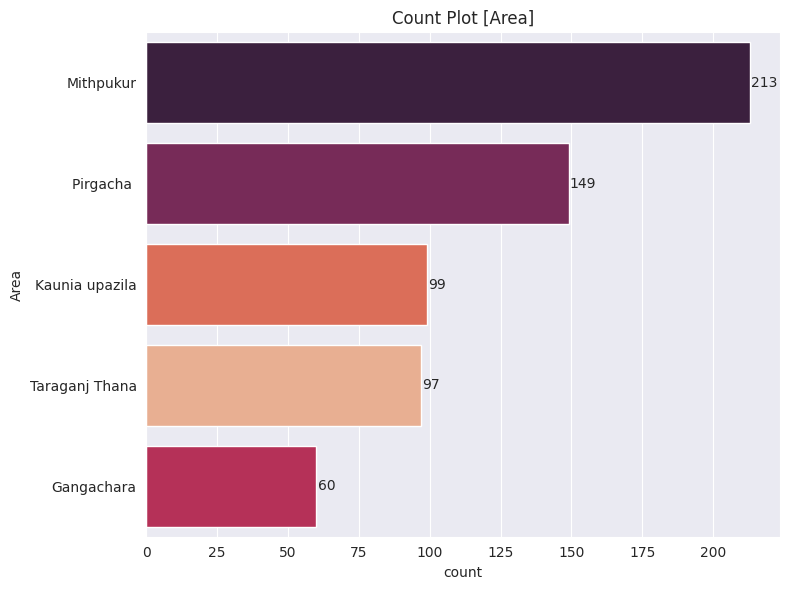

In [109]:
count_plot(df, 'Area')

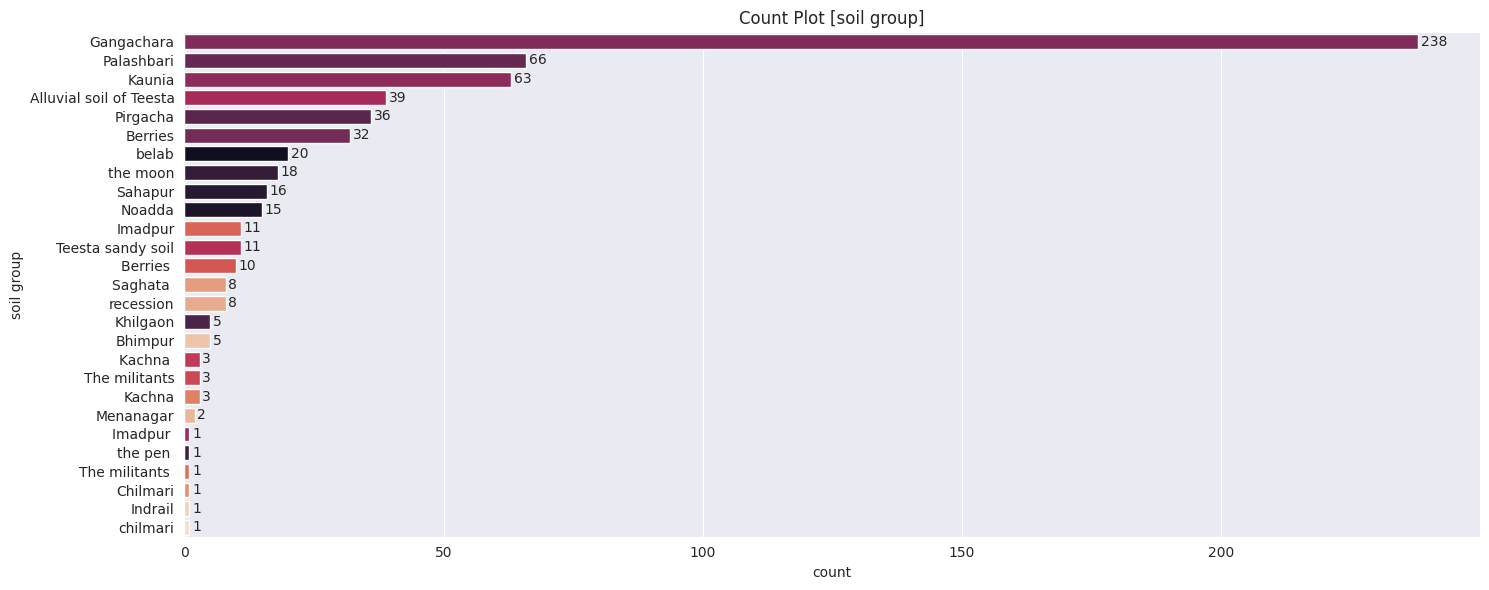

In [110]:
count_plot(df, 'soil group', figsize=(15, 6))

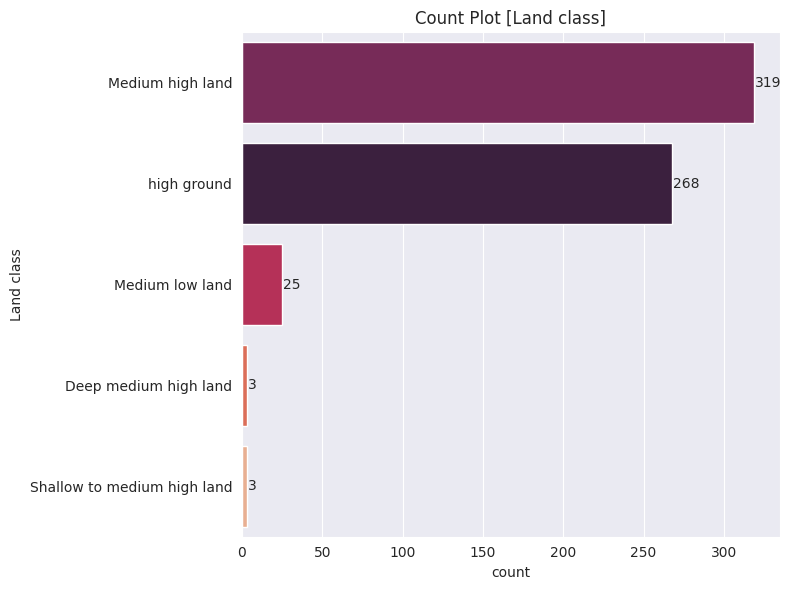

In [111]:
count_plot(df, 'Land class')

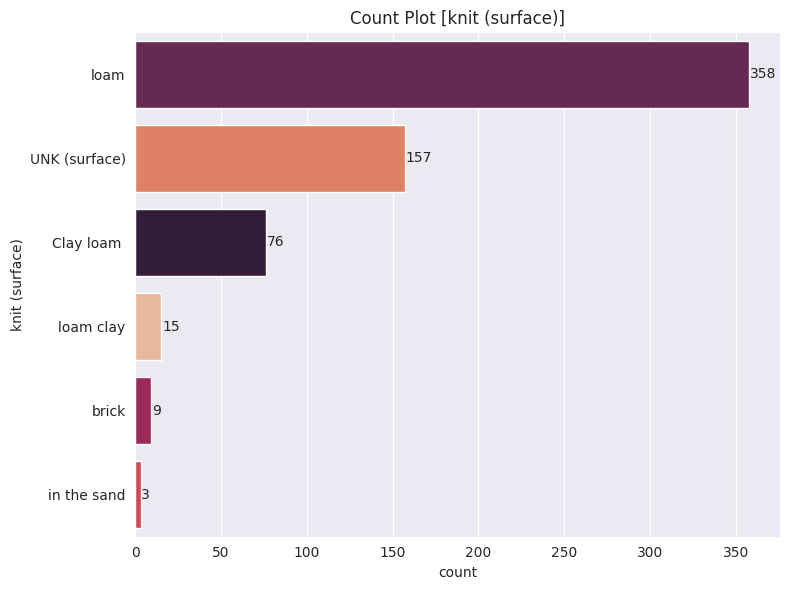

In [112]:
count_plot(df, 'knit (surface)')

* **Class imbalance** is evident at all the categorical variables

## Skewness and kurtosis

In [74]:
for col in num_cols:
    print(f"{col}\nSkew: {df[col].skew()}\nKurtosis: {df[col].kurt()}\n")

pH
Skew: 1.2457086046485975
Kurtosis: 3.518202337891109

Nitrogen N (%)
Skew: 24.273522024476133
Kurtosis: 598.1980662302283

Potassium K (meq/100)
Skew: 22.48827842323524
Kurtosis: 539.696920470605

Phosphorus P (ug/g)
Skew: 2.6204366117054834
Kurtosis: 7.9917981031786915

Sulfur S (ug/g)
Skew: 1.9051789386025497
Kurtosis: 5.833945698085442



* **N** and **K** are highly skewed.
* **pH**, **P** and **S** are moderately skewed in respect to **N** and **K**

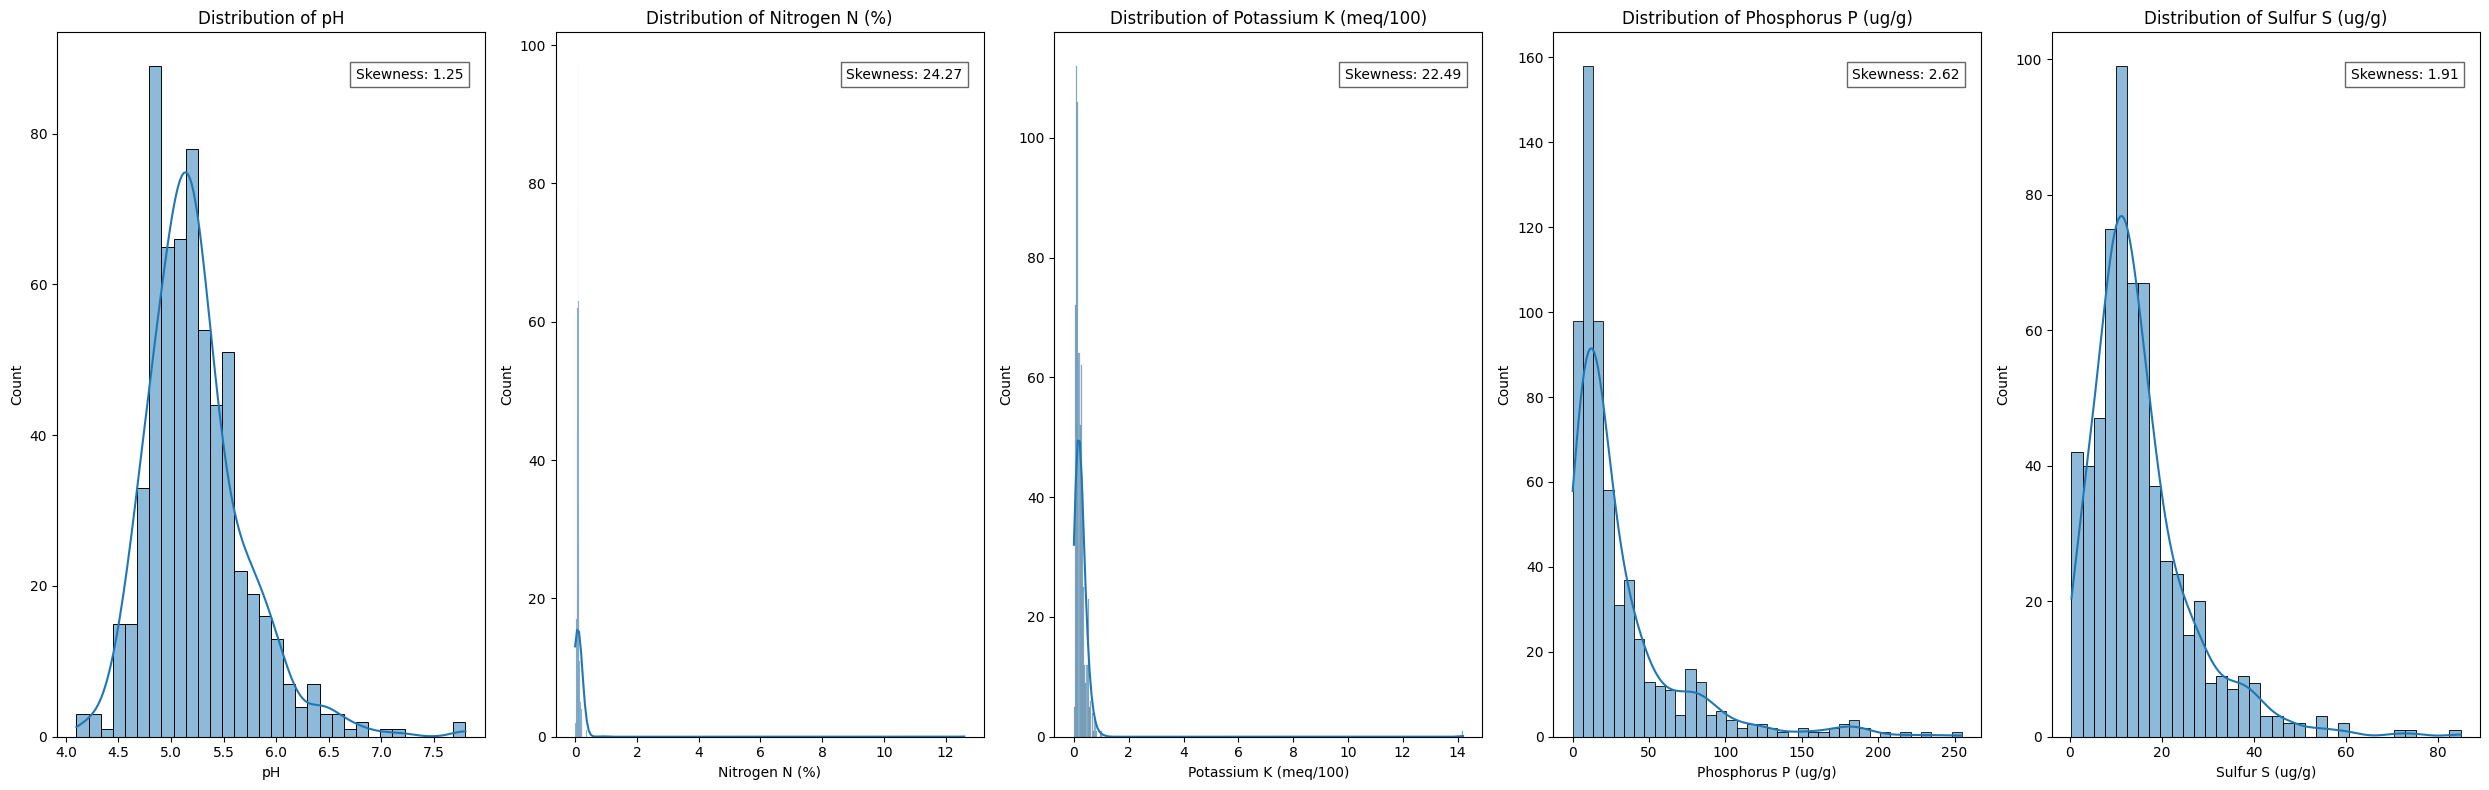

In [114]:
fig, axes = plt.subplots(1, 5, figsize=(25, 8))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

    skew_val = df[col].skew()
    axes[i].text(0.95, 0.95, f'Skewness: {skew_val:.2f}',
                transform=axes[i].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

## Histogramp based on land type

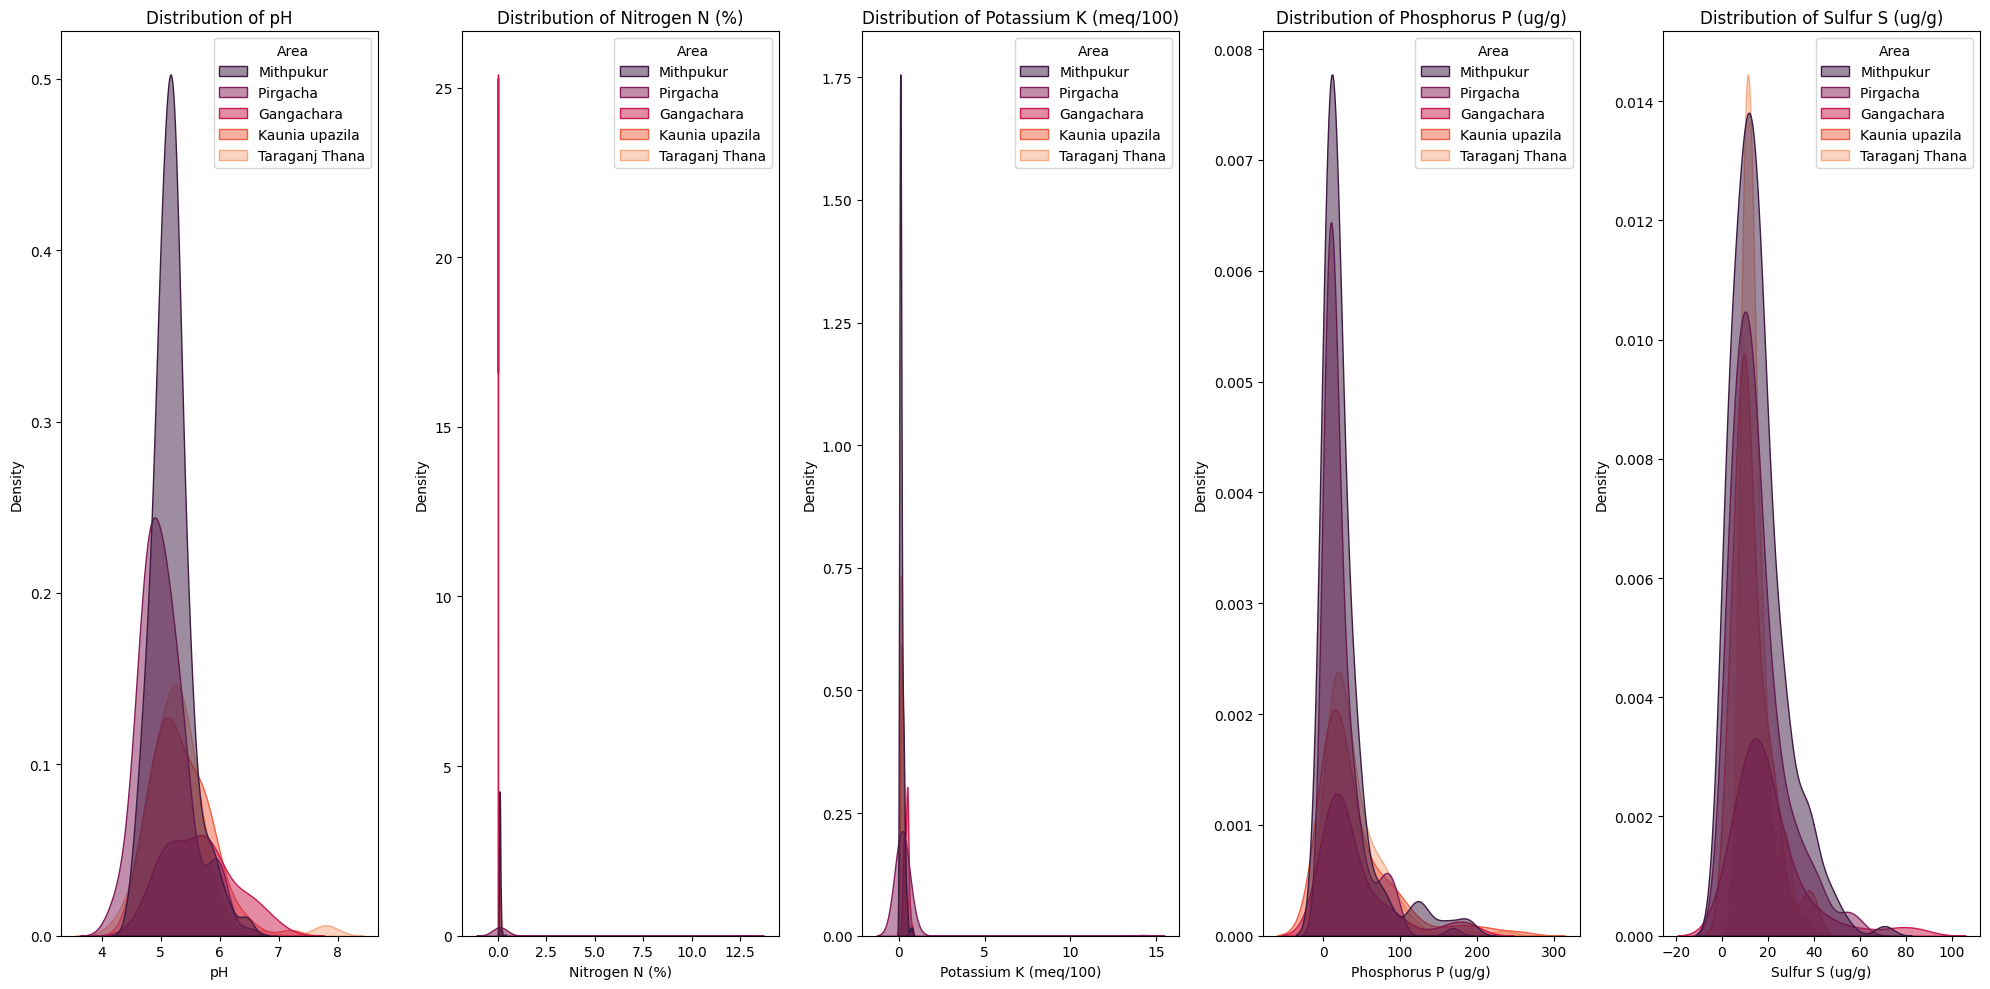

In [122]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df,
                x=col,
                ax=axes[i],
                hue='Area',
                fill=True,
                palette='rocket',
                alpha=.5)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

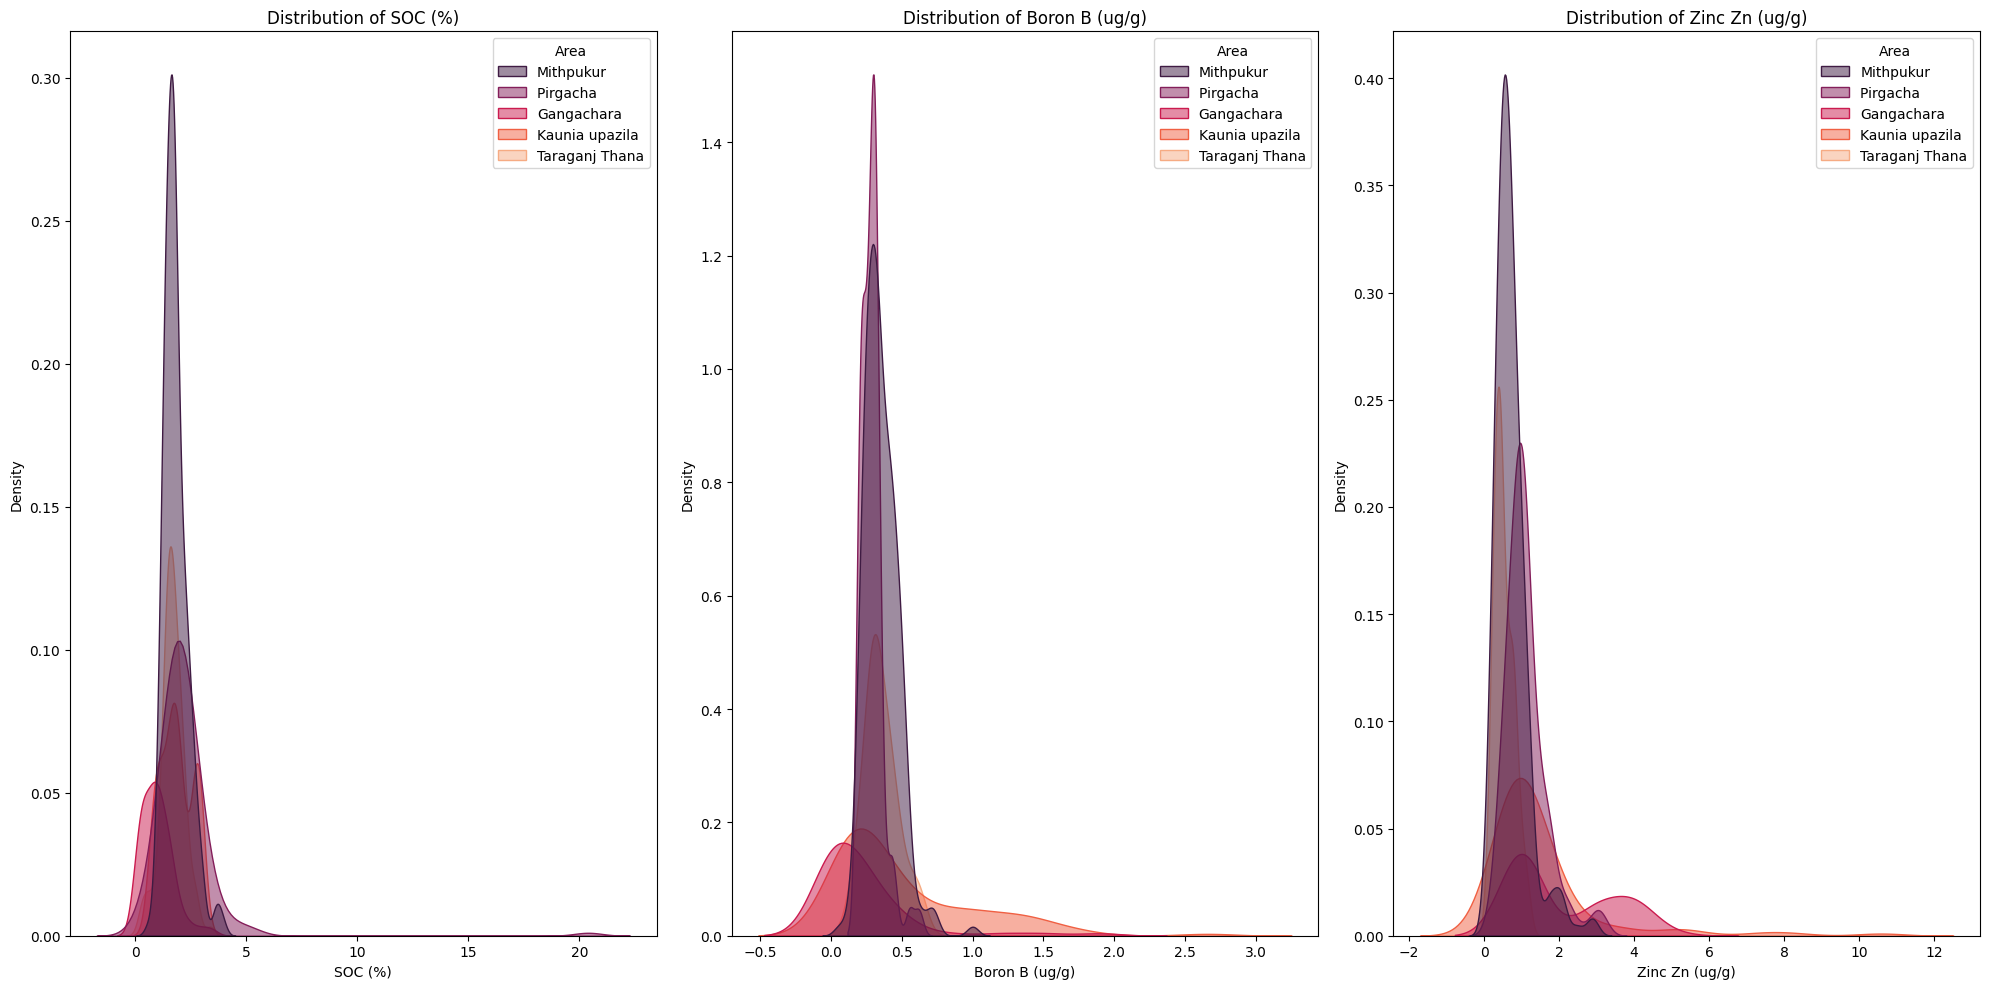

In [119]:
# Distribution of the target variables

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(target_cols):
    sns.kdeplot(data=df,
                x=col,
                ax=axes[i],
                hue='Area',
                fill=True,
                palette='rocket',
                alpha=.5)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

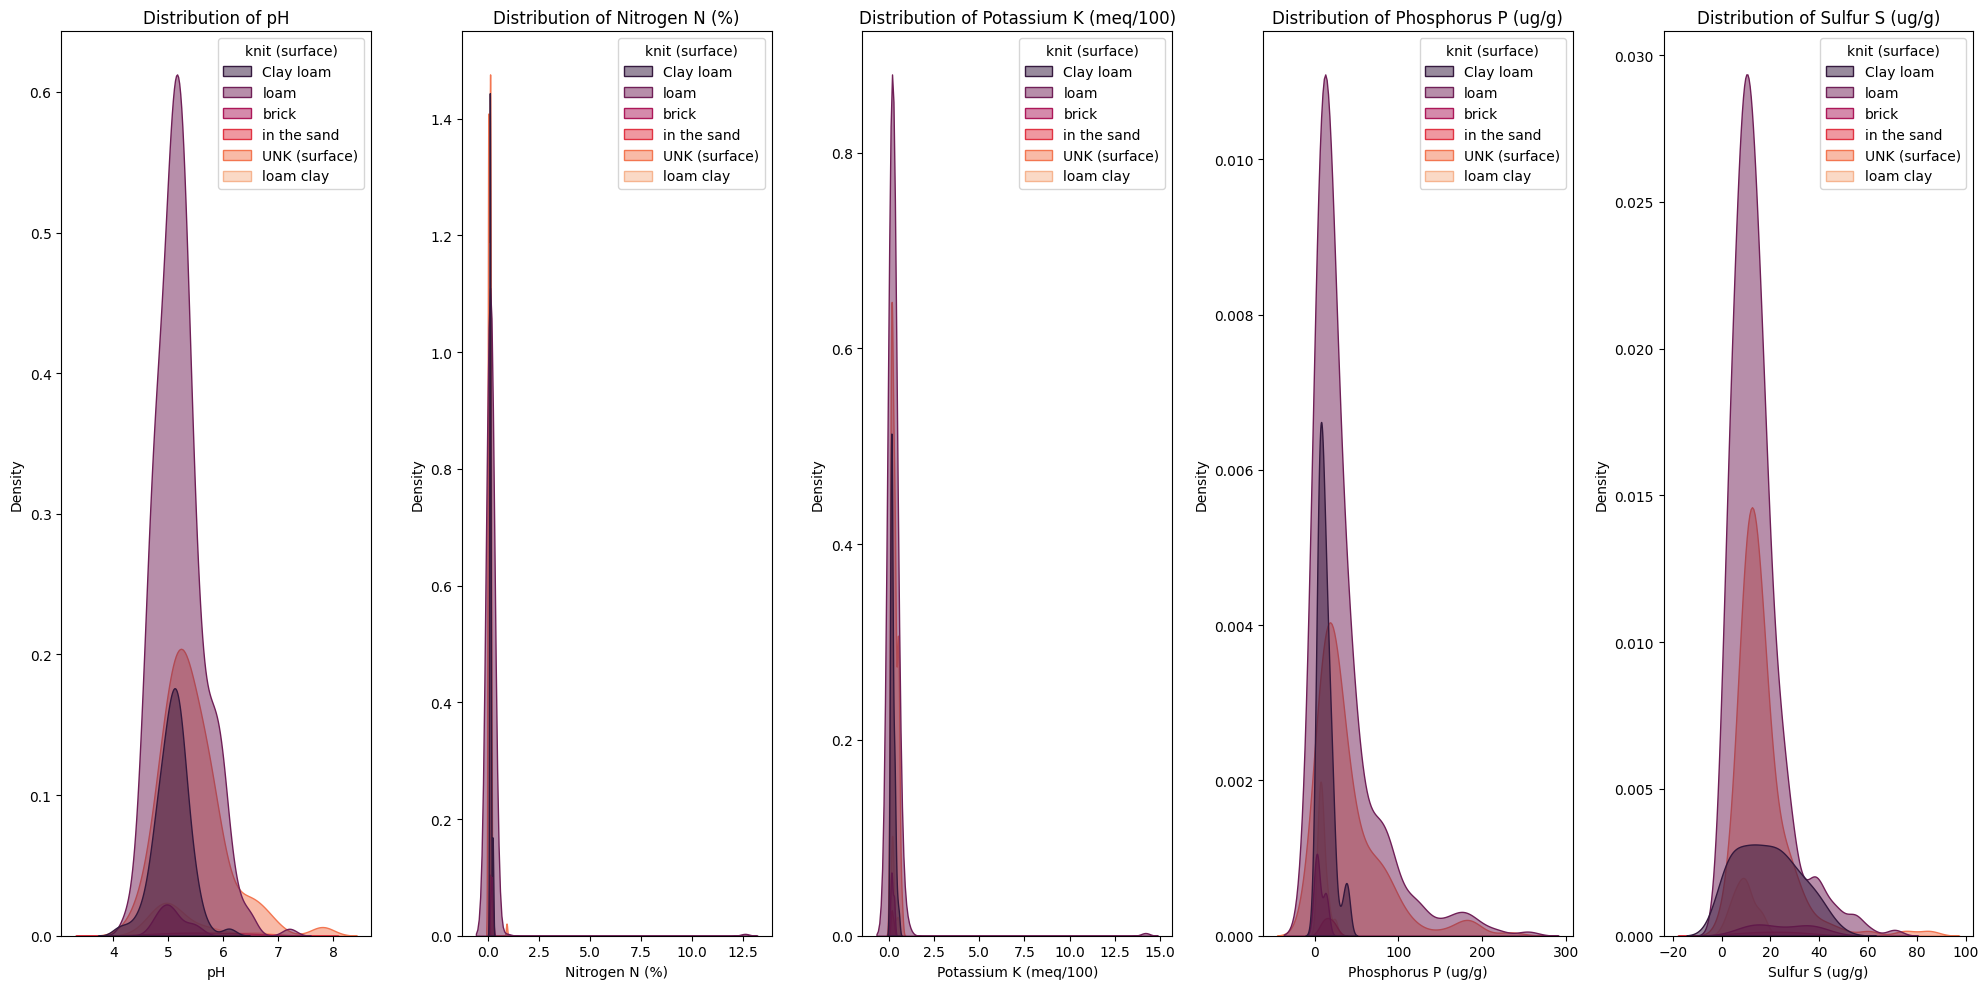

In [117]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df,
                x=col,
                ax=axes[i],
                hue='knit (surface)',
                fill=True,
                palette='rocket',
                alpha=.5,
                warn_singular=False)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

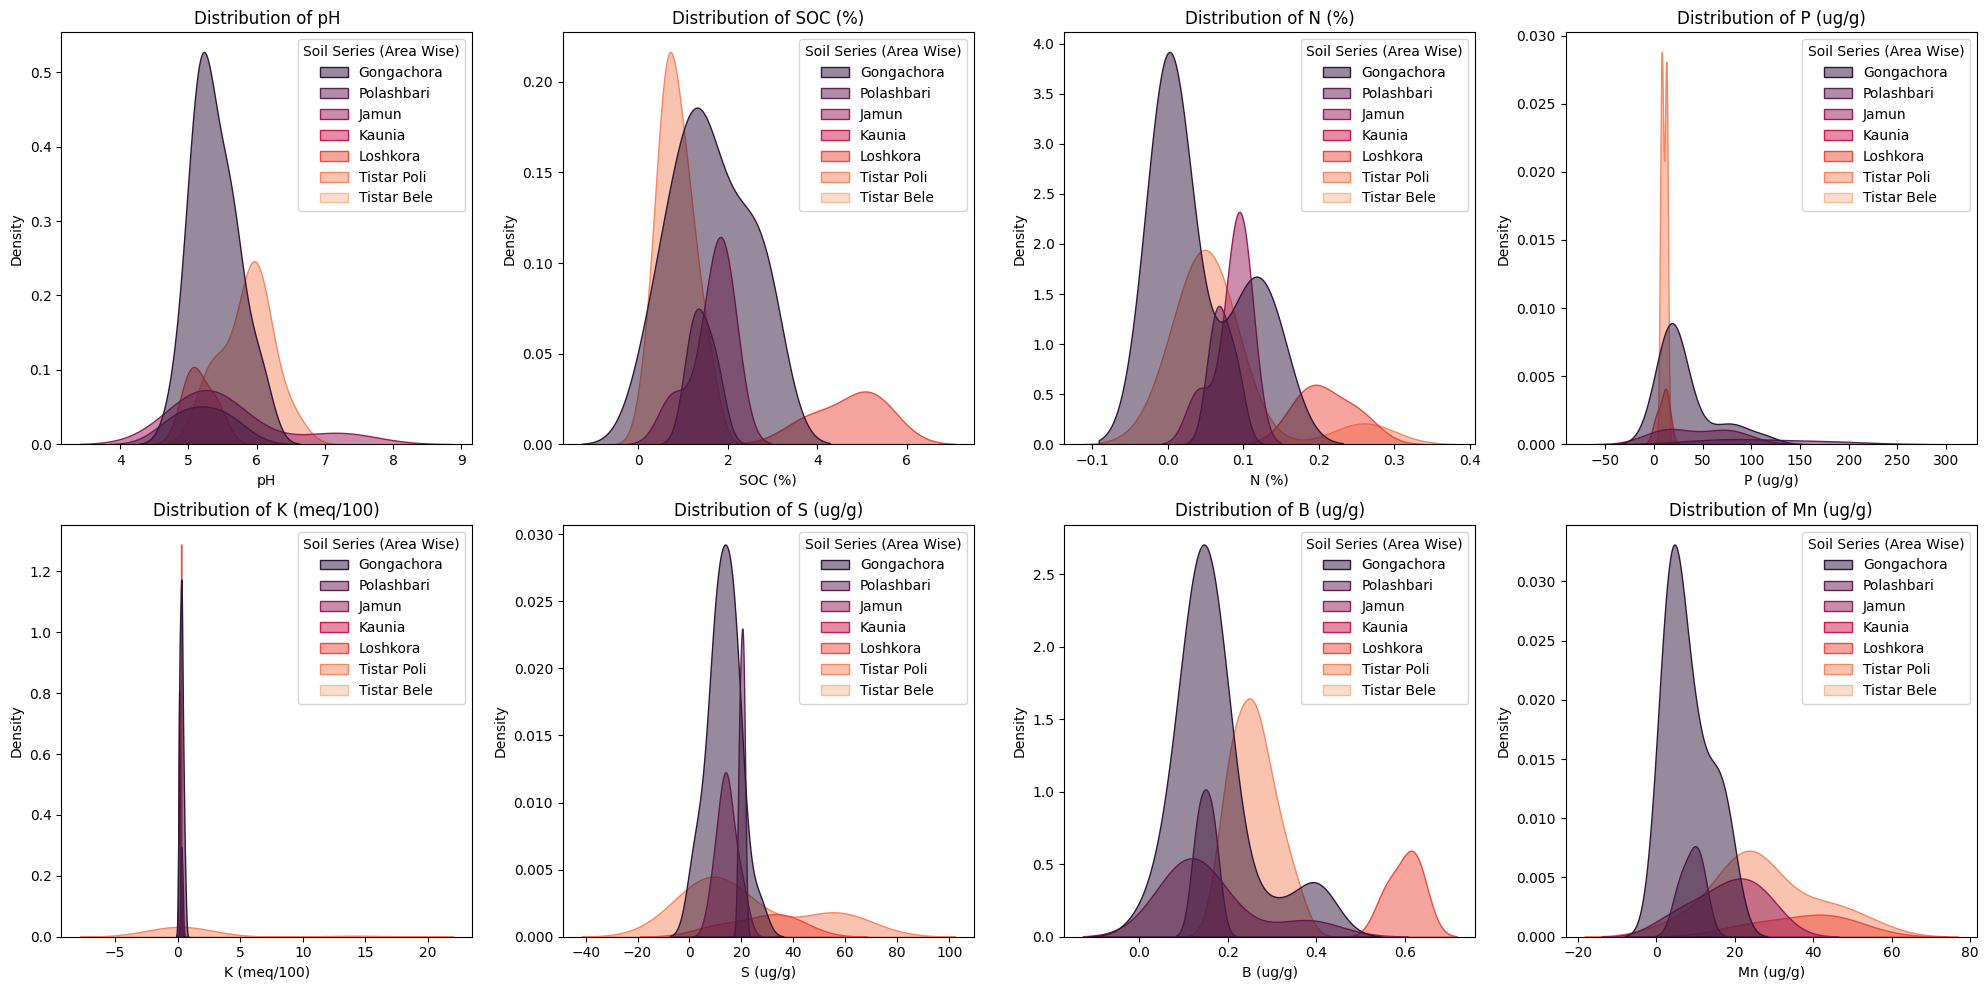

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_cols[1:], ):
    sns.kdeplot(data=df,
                x=col,
                ax=axes[i],
                hue='Soil Series (Area Wise)',
                fill=True,
                palette='rocket',
                alpha=.5,
                warn_singular=False)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Pairplot (Correlation plot)

In [131]:
def scatter_plot(df, x_col, y_col, ax_id=None, hue=None, figsize=(8, 6), palette=None):
    plt.figure(figsize=figsize)
    with sns.axes_style("darkgrid"):
        ax = sns.scatterplot(data=df,
                            x=x_col,
                            y=y_col,
                            ax=axes[ax_id] if ax_id else None,
                            hue=hue,
                            palette=palette)
        plt.title(f'Scatter Plot [{x_col} vs {y_col}]')
        plt.tight_layout()
        plt.show()

# plt.figure(figsize=(20, 8))
# sns.pairplot(df[[target_cols[0]] + num_cols], corner=True)
# plt.show()

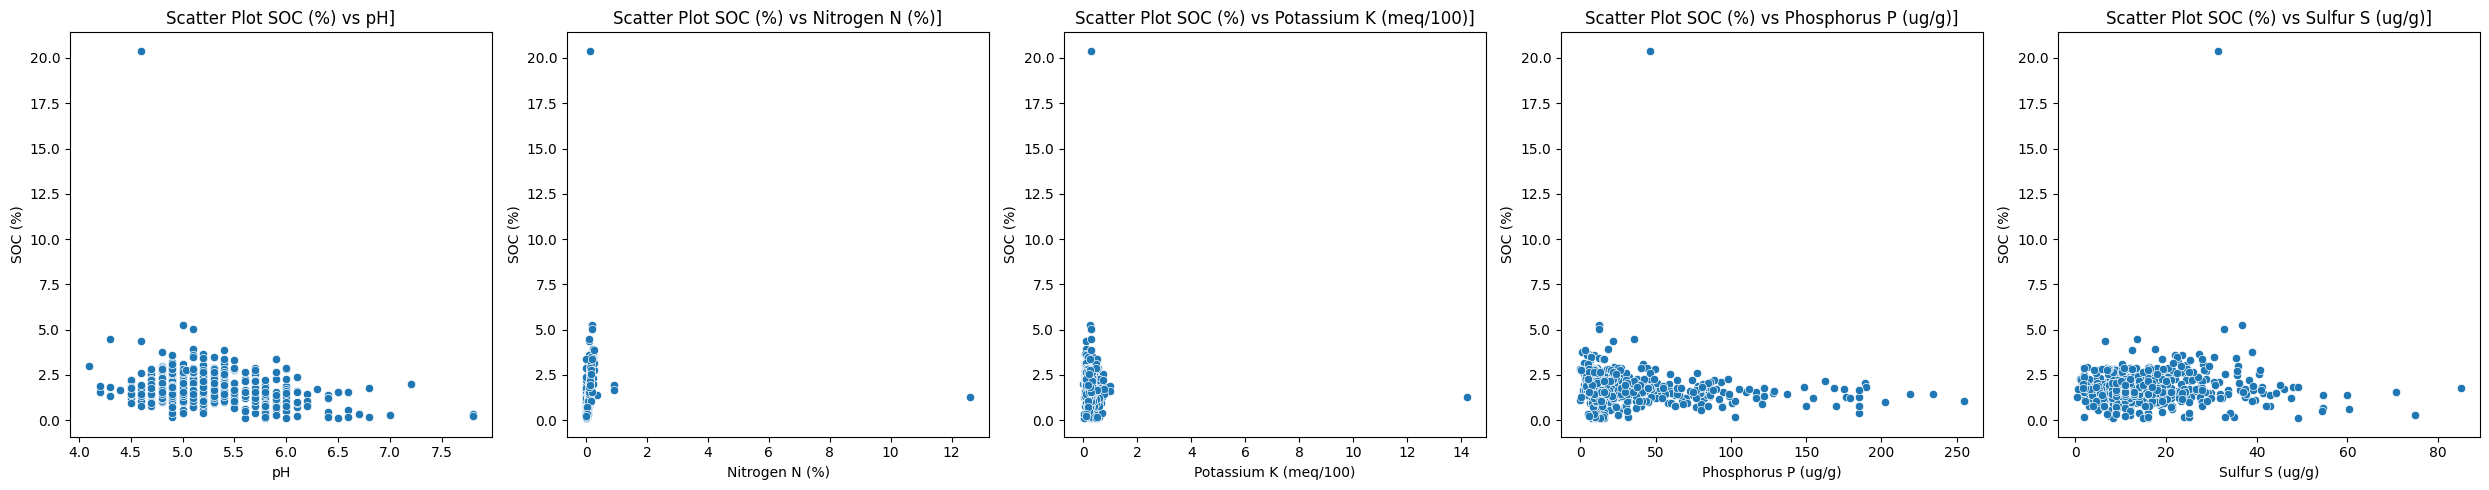

In [140]:
x_col = target_cols[0]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(data=df,
                    x=col,
                    y=x_col,
                    ax=axes[i])
    axes[i].set_title(f'Scatter Plot {x_col} vs {col}]')

plt.tight_layout()
plt.show()


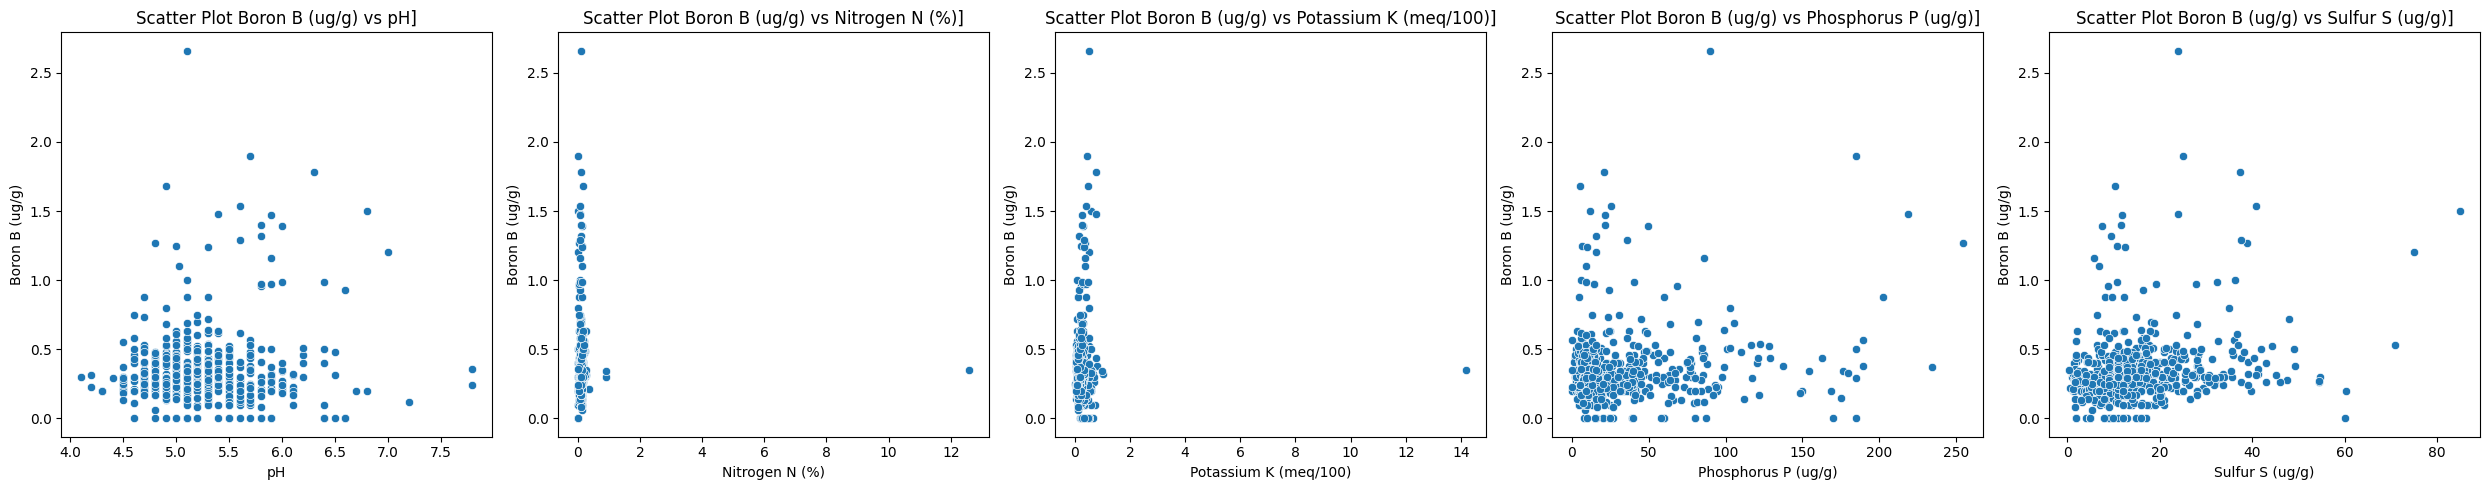

In [141]:
x_col = target_cols[1]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(data=df,
                    x=col,
                    y=x_col,
                    ax=axes[i])
    axes[i].set_title(f'Scatter Plot {x_col} vs {col}]')

plt.tight_layout()
plt.show()


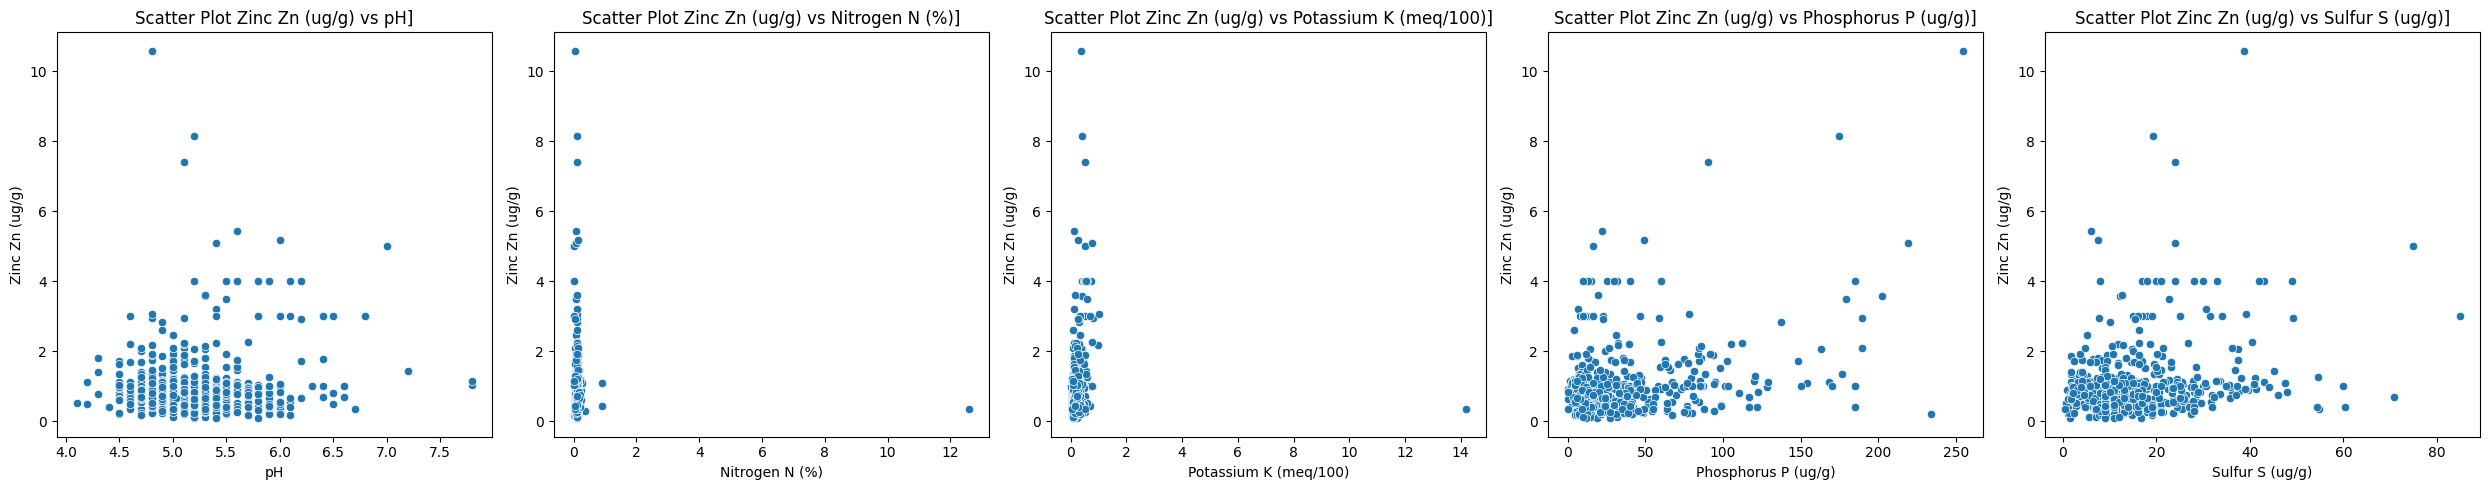

In [142]:
x_col = target_cols[2]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(data=df,
                    x=col,
                    y=x_col,
                    ax=axes[i])
    axes[i].set_title(f'Scatter Plot {x_col} vs {col}]')

plt.tight_layout()
plt.show()


# Heatmaps

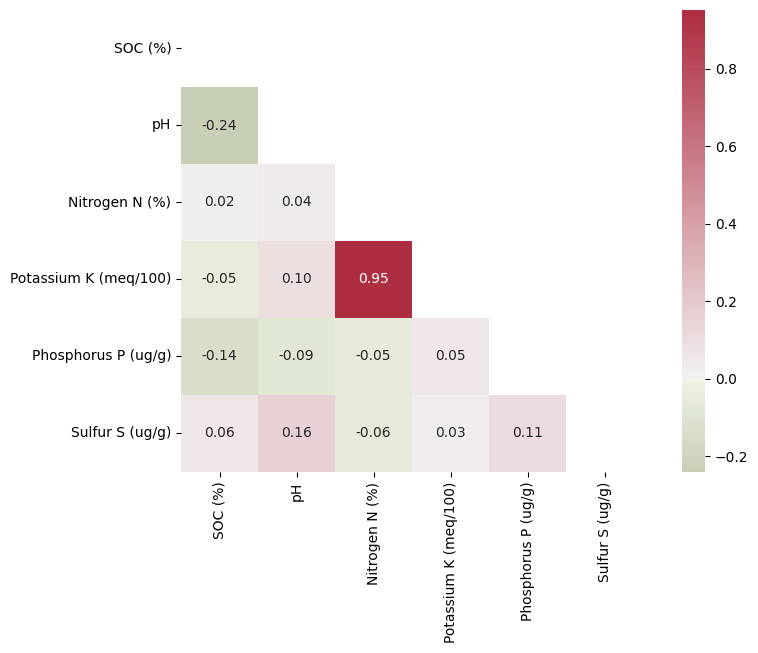

In [153]:
corr =  df[[target_cols[0]] + num_cols].corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show()

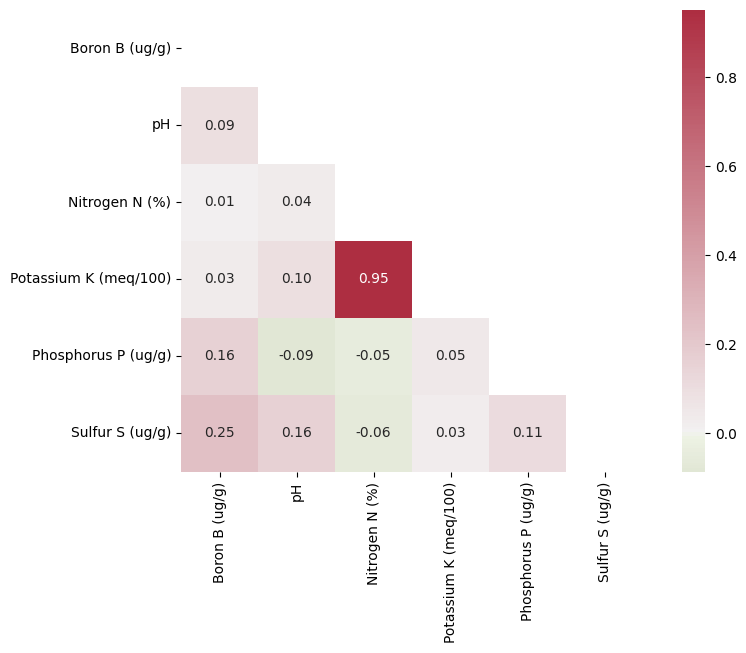

In [154]:
corr =  df[[target_cols[1]] + num_cols].corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show()

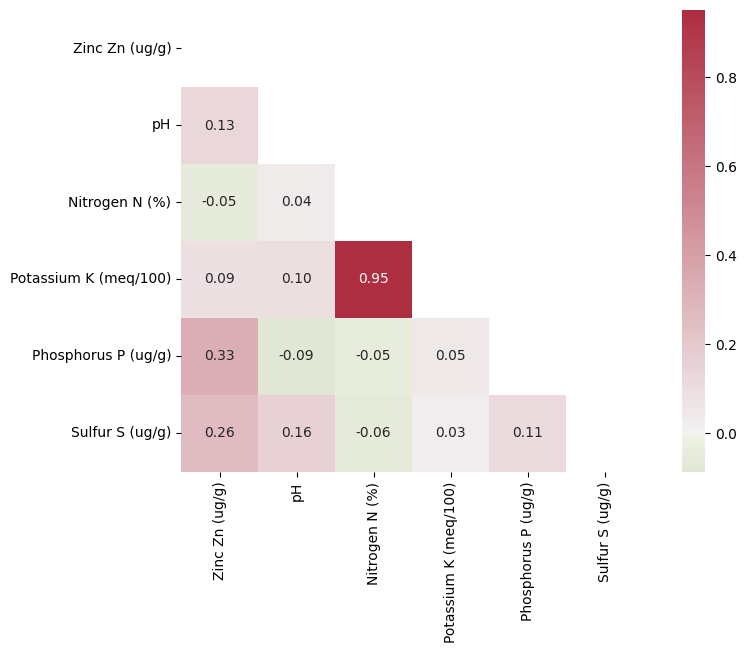

In [155]:
corr =  df[[target_cols[2]] + num_cols].corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show()

# P-value and correlation between target variables vs other numerical features

In [156]:
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns

def corr_full(df, numeric_only=True, rows=['corr', 'p-value', 'obs']):
    """
    Generates a correlation matrix with correlation coefficients,
    p-values, and observation count.

    Args:
    - df:                  Input dataframe
    - numeric_only (bool): Whether to consider only numeric columns for
                           correlation. Default is True.
    - rows:                Determines the information to show.
                           Default is ['corr', 'p-value', 'obs'].

    Returns:
    - formatted_table: The correlation matrix with the specified rows.
    """

    # Calculate Pearson correlation coefficients
    corr_matrix = df.corr(
        numeric_only=numeric_only)

    # Calculate the p-values using scipy's pearsonr
    pvalue_matrix = df.corr(
        numeric_only=numeric_only,
        method=lambda x, y: pearsonr(x, y)[1])

    # Calculate the non-null observation count for each column
    obs_count = df.apply(lambda x: x.notnull().sum())

    # Calculate observation count for each pair of columns
    obs_matrix = pd.DataFrame(
        index=corr_matrix.columns, columns=corr_matrix.columns)
    for col1 in obs_count.index:
        for col2 in obs_count.index:
            obs_matrix.loc[col1, col2] = min(obs_count[col1], obs_count[col2])

    # Create a multi-index dataframe to store the formatted correlations
    formatted_table = pd.DataFrame(
        index=pd.MultiIndex.from_product([corr_matrix.columns, rows]),
        columns=corr_matrix.columns
    )

    # Assign values to the appropriate cells in the formatted table
    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if 'corr' in rows:
                formatted_table.loc[
                    (col1, 'corr'), col2] = corr_matrix.loc[col1, col2]

            if 'p-value' in rows:
                # Avoid p-values for diagonal they correlate perfectly
                if col1 != col2:
                    formatted_table.loc[
                        (col1, 'p-value'), col2] = f"({pvalue_matrix.loc[col1, col2]:.4f})"
            if 'obs' in rows:
                formatted_table.loc[
                    (col1, 'obs'), col2] = obs_matrix.loc[col1, col2]

    return(formatted_table.fillna('')
           .style.set_properties(**{'text-align': 'center'}))


result_soc = corr_full(df[[target_cols[0]] + num_cols], rows=['corr', 'p-value' ])
result_soc

In [157]:
result_b = corr_full(df[[target_cols[1]] + num_cols], rows=['corr', 'p-value' ])
result_b

In [158]:
result_zn = corr_full(df[[target_cols[2]] + num_cols], rows=['corr', 'p-value' ])
result_zn